# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction, which is widely used in data analysis and machine learning. PCA transforms the data into a new coordinate system such that the greatest variances by any projection of the data come to lie on the first coordinates (called principal components), the second greatest variances on the second coordinates, and so on.

## Why Use PCA?

- **Reduce Dimensionality:** Simplifies the data by reducing the number of variables.
- **Remove Noise:** Helps in eliminating noise and retaining important information.
- **Visualize Data:** Allows for visualization of high-dimensional data in 2D or 3D.
- **Improve Performance:** Reduces computational cost and improves the performance of machine learning models.

## When to Use PCA?

- When you have a large number of variables.
- When variables are correlated.
- When you need to visualize high-dimensional data.
- When you want to remove noise and redundancy from the data.

## What is a Principal Component?

A principal component is a linear combination of the original variables in the dataset. It is a direction in the data that maximizes the variance. The first principal component is the direction where the data varies the most. The second principal component is orthogonal to the first and is the direction of the second highest variance, and so on. Each principal component is a new variable that is a combination of the original variables, and it helps in reducing the dimensionality of the data while retaining as much variance as possible.

## Mathematical Foundations of PCA

PCA works by identifying the axes (principal components) that maximize the variance in the data.

### Steps Involved in PCA:

1. **Standardize the Data:** Subtract the mean and divide by the standard deviation for each feature.
2. **Compute the Covariance Matrix:** Calculate the covariance matrix of the standardized data.
3. **Calculate Eigenvalues and Eigenvectors:** Compute the eigenvalues and eigenvectors of the covariance matrix.
4. **Sort Eigenvalues and Eigenvectors:** Sort the eigenvalues and their corresponding eigenvectors in descending order.
5. **Select Principal Components:** Choose the top k eigenvectors that correspond to the k largest eigenvalues.
6. **Transform the Data:** Project the original data onto the selected principal components.

### Covariance Matrix

The covariance matrix is a measure of how much each of the dimensions varies from the mean with respect to each other.

---



>$$\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$$


---
### Eigenvalues and Eigenvectors

An eigenvector of a square matrix $A$ is a non-zero vector $v$ such that multiplying $A$ by $v$ simply scales $ v$ by a scalar factor $\lambda$:

---


>$$A \cdot v = \lambda \cdot v$$

Where $\lambda$ is the eigenvalue corresponding to the eigenvector $v$.

---

## Additional Concepts

### Scree Plot

A scree plot is a graphical representation of the eigenvalues associated with each principal component. It helps in determining the number of principal components to retain.

### Cumulative Explained Variance

The cumulative explained variance shows the total variance explained by the first k principal components. It helps in deciding how many components are needed to capture a certain percentage of the total variance.

### Biplot

A biplot is a graphical display that plots both the principal component scores and the principal component loadings. It provides insights into the relationships between variables and observations in the new principal component space.

## Determining the Number of Principal Components

There are various methods to determine the number of principal components to retain. Two common criteria are:

### Kaiser Criterion

The Kaiser criterion suggests retaining all principal components with eigenvalues greater than 1. This is based on the idea that a component must capture more variance than a single original variable.

### Saporta Criterion

The Saporta criterion is a more stringent test that suggests retaining components with eigenvalues greater than:

---


>$$\lambda > 1 + 2 \sqrt{\frac{P-1}{n-1}}$$

where \(P\) is the number of original variables, and \(n\) is the number of observations.


---

## Implementation of PCA with Examples

Let's implement PCA using Python's `numpy` and `scikit-learn` libraries.

In [29]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generating a sample dataset with clear structure
np.random.seed(42)
# Creating 5 clusters in a 20-dimensional space
cluster_centers = np.random.randn(5, 20) * 10

# Assigning points to clusters
data = np.vstack([np.random.randn(100, 20) + cluster_center for cluster_center in cluster_centers])

# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(data_std)

# Creating a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components[:, :2], columns=['Principal Component 1', 'Principal Component 2'])

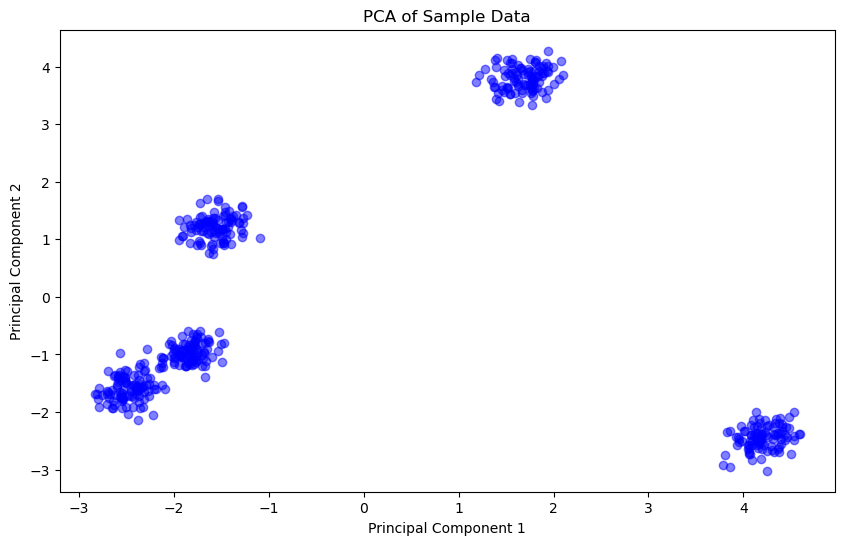

In [30]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], color='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sample Data')
plt.show()

In [31]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [3.26335985e-01 2.56238580e-01 2.35422669e-01 1.56983171e-01
 6.34183747e-03 4.14972952e-03 3.03030676e-03 2.21765232e-03
 1.80692634e-03 1.16721309e-03 1.06008836e-03 9.37720628e-04
 8.08586428e-04 7.03032537e-04 6.46575906e-04 5.66132791e-04
 4.88840993e-04 4.38237160e-04 3.76957077e-04 2.79757309e-04]


In [32]:
# Eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues:", eigenvalues)

Eigenvalues: [6.53979930e+00 5.13504167e+00 4.71788916e+00 3.14595534e+00
 1.27090931e-01 8.31609123e-02 6.07275904e-02 4.44419304e-02
 3.62109488e-02 2.33910439e-02 2.12442558e-02 1.87919966e-02
 1.62041368e-02 1.40888284e-02 1.29574330e-02 1.13453465e-02
 9.79641269e-03 8.78230781e-03 7.55425004e-03 5.60635889e-03]


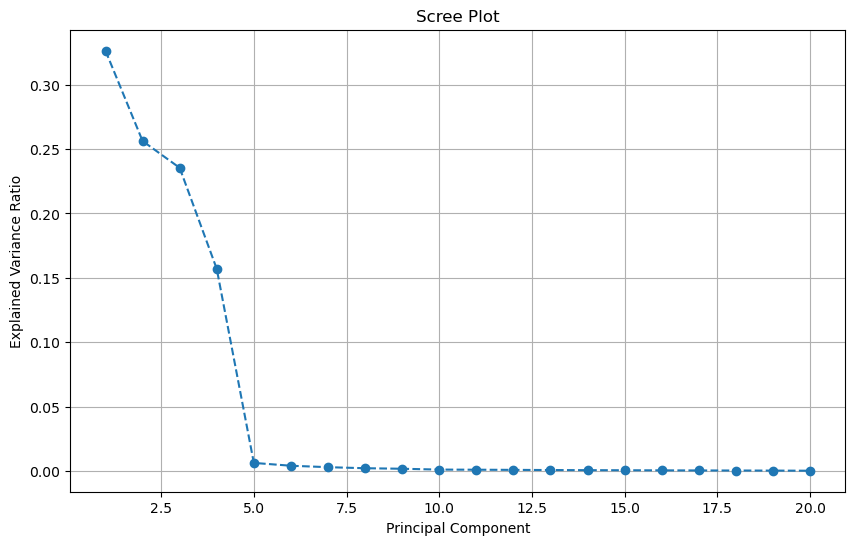

In [33]:
# Plotting the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

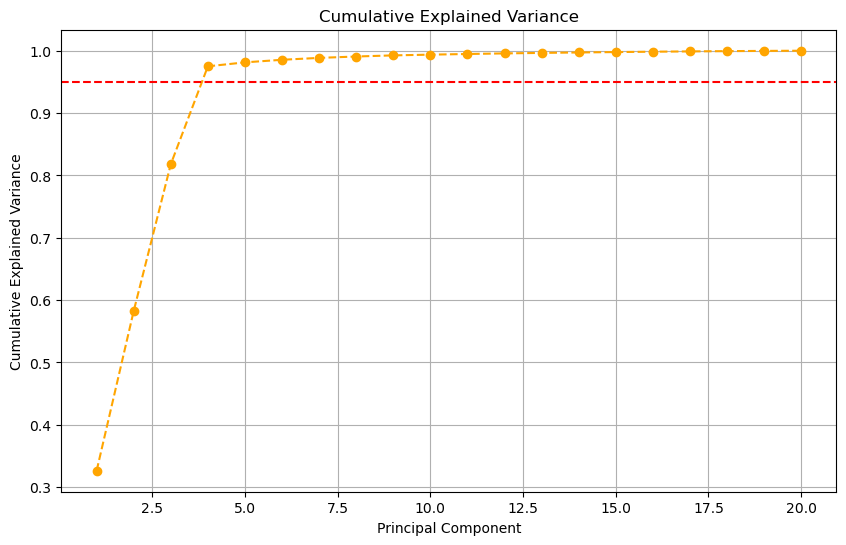

In [34]:
# Plotting cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.grid(True)
plt.show()

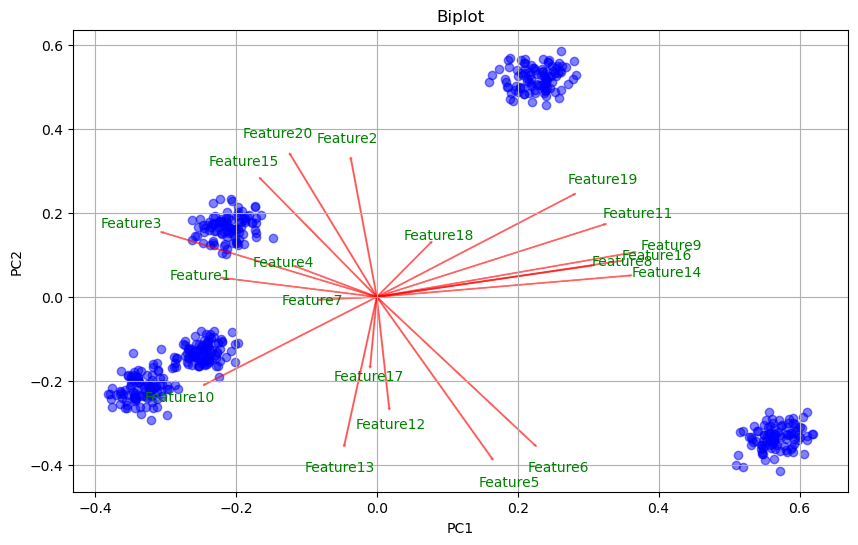

In [35]:
# Function to draw a biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='b', alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Plotting the biplot
plt.figure(figsize=(10, 6))
biplot(principal_components, np.transpose(pca.components_), labels=['Feature' + str(i) for i in range(1, 21)])
plt.title('Biplot')
plt.show()


## Interpreting the Results

The results of the PCA analysis, including the explained variance ratio and the scree splot, provide insights into the underlying structure of the data. Here is a detailed interpretation:

### Explained Variance Ratio

The explained variance ratio indicates how much variace in the data is captured by each principal component. In this analysis, the first few components capture the most variance:

```
Explained Variance Ratio: [3.26335985e-01 2.56238580e-01 2.35422669e-01 1.56983171e-01
 6.34183747e-03 4.14972952e-03 3.03030676e-03 2.21765232e-03
 1.80692634e-03 1.16721309e-03 1.06008836e-03 9.37720628e-04
 8.08586428e-04 7.03032537e-04 6.46575906e-04 5.66132791e-04
 4.88840993e-04 4.38237160e-04 3.76957077e-04 2.79757309e-04]
```

* Principal Component 1 (PC1): Explains approximately 32.63% of the variance
* Principal Component 2 (PC2): Explains approximately 25.62% of the variance
* Principal Component 3 (PC3): Explains approximately 23.54% of the variance
* Principal Component 4 (PC4): Explains approximately 15.70% of the variance
* The remaining components each explain less than 1% of the variance

### Scree Plot

The scree plot visually displays the explained variance of each principal component. In this plot, you can identify the `"elbow"` point. which helps determine the optimal number of components to retain:

From the scree plot, you can observe that the first four components capture most of the variance, as the explained variance drops significantly after the fourth component. This suggests that retaining the first four components would be a reasonable choice.

### Cumulative Explained Variance

The cumulative explained variance plot shows the total variance explained by the first k principal components:

From the cumulative explained variace plot, you can see that the first four components explain nearly 100% of the variance in the data. This further supports the decision to retain the first four components

### Biplot

The biplot provides a graphical representation of the principal components and the original variables:

The biplot shows the principal component scores for each observation (blue points) and the loadings for each variable (red arrows). The loadings indicate the contribution of each original variable to the principal components.

### Interpretation Summary

* Dimensionality Reduction: The first four principal components capture nearly all the variance in the data, reducing the dimensionality from 20 to 4 while retaining most of the information.

* Visualization: The biplot provides insights into the relationships between the original variables and the principal components.

* Variance Explanation: The first four components explain the majority of the variance, making them the most significant for further analysis.

By retaining the first four principal components, you can simplify the data while preserving most of the important information, making it easier to visualize and analyze.